# Adult Data Set

In [1]:
# Importok betöltése

import pandas as pd
import numpy as np
import os

In [2]:
# Mivel az adatok vesszővel elválasztva vannak előkészítve, ezért CSV-ként olvasom be.
# Nincs leíró sor, ezért definiálom az oszlop neveket.
columns = ['age', 'workclass', 'finalWeight', 'education', 'educationalNum','maritalStatus', 'occupation', 'relationship', 'race', 'gender','capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry','income']
train = pd.read_csv("adult.data", sep=",\s", header = None, names = columns, engine = "python")
test = pd.read_csv("./data/adult.test", sep=",\s", header = None,  skiprows = 1, names = columns, engine = "python")
test['income'].replace(regex = True, inplace = True, to_replace = r'\.', value = r'')
dataset = pd.concat([test, train])
dataset.head(10)

,age,workclass,finalWeight,education,educationalNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
# Adattisztítás
### outlier lehet az aki heti 1 órát dolgozik de többet keres mint 50K
## Redukálás
### Ha oszlopokat megnézzük láthatjuk, hogy education csökkenthető, ha mondjuk csak a számokkal dolgozunk tovább, és csak akkor vesszük elő, ha szükséges

edu_level = {}
for x,y in dataset[['educationalNum','education']].drop_duplicates().itertuples(index = False):
    edu_level[x] = y

dataset.drop('education',
  axis = 'columns', inplace = True)

In [4]:
for col in set(dataset.columns) - set(dataset.describe().columns):
    dataset[col] = dataset[col].astype('category')
print('Size: ', dataset.shape)
dataset.info()
### Ahogy látjuk több folytonos érték is van mint age, finalWeight, capitalGain, capitalLoss, hoursPerWeek

Size:  (48842, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   finalWeight     48842 non-null  int64   
 3   educationalNum  48842 non-null  int64   
 4   maritalStatus   48842 non-null  category
 5   occupation      48842 non-null  category
 6   relationship    48842 non-null  category
 7   race            48842 non-null  category
 8   gender          48842 non-null  category
 9   capitalGain     48842 non-null  int64   
 10  capitalLoss     48842 non-null  int64   
 11  hoursPerWeek    48842 non-null  int64   
 12  nativeCountry   48842 non-null  category
 13  income          48842 non-null  category
dtypes: category(8), int64(6)
memory usage: 3.0 MB


In [5]:
dataset.describe()

,age,finalWeight,educationalNum,capitalGain,capitalLoss,hoursPerWeek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
#dataset.nlargest(1, 'age')
dataset.nsmallest(1, 'age')

#dataset.nlargest(1, 'hoursPerWeek')
#dataset.nsmallest(1, 'hoursPerWeek')

,age,workclass,finalWeight,educationalNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
50,18.0,Private,54440,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# Ezek alapján láthatjuk, hogy az age alatt találunk 17 éveseket is, mivel 'Adult'-ról beszélünk ezért kiszűröm a 18 alattiakat
dataset.age[dataset.age < 18] = np.nan;


/home/mgulyas/workspace/adult-payment-notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print('Total missing attributes:', (dataset.values == '?').sum(axis = 0).sum(axis = 0))

for column, missingNumber in zip(dataset.columns,(dataset.values == '?').sum(axis = 0)):
    print(str(column) + ': ' + str(missingNumber) + ' records')
    if missingNumber > 0:
        dataset[column].replace('?', np.nan, inplace = True)

del column
del missingNumber

Total missing attributes: 6465
age: 0 records
workclass: 2799 records
finalWeight: 0 records
educationalNum: 0 records
maritalStatus: 0 records
occupation: 2809 records
relationship: 0 records
race: 0 records
gender: 0 records
capitalGain: 0 records
capitalLoss: 0 records
hoursPerWeek: 0 records
nativeCountry: 857 records
income: 0 records


In [9]:
# Mi van ha megpróbálom kitölteni a hiányzó attribútumokat? méreteit tekintve nem érdemes manuális kitöltéssel szórakozni


In [10]:
print('First of all I will remove all record where missing attribute found')
dataset.dropna(axis=0, how='any', inplace=True)
print('Size: ', dataset.shape)



First of all I will remove all record where missing attribute found
Size:  (44729, 14)


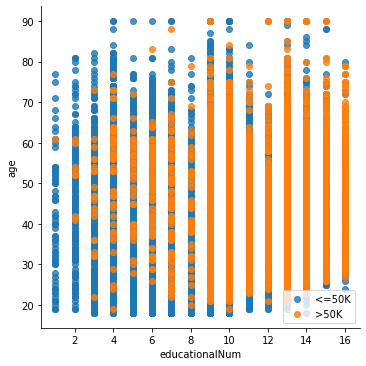

In [11]:
# https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/
# Use the 'hue' argument to provide a factor variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot( x="educationalNum", y="age", data=dataset, fit_reg=False, hue='income', legend=False)
#violinchart

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

Income ratio:


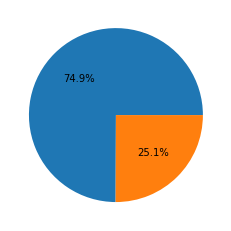

In [12]:
plt.pie([(dataset.income == '<=50K').sum(axis = 0), (dataset.income == '>50K').sum(axis = 0)], autopct="%.1f%%")
print('Income ratio:')
my_circle=plt.Circle((0,0), 0.0)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

del my_circle
del p

dict_values(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'])


Text(0, 0.5, 'Proportion of population')

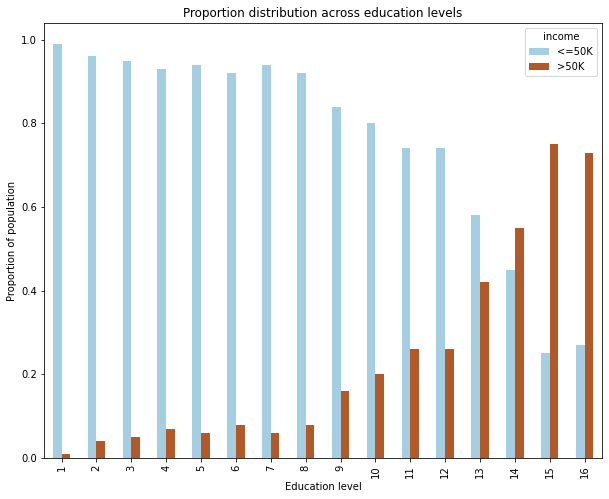

In [13]:
# Try to map the educational number with the education
print(edu_level.values())
education = round(pd.crosstab(dataset.educationalNum, dataset.income)
                  .div(pd.crosstab(dataset.educationalNum, dataset.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8), colormap='Paired')
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

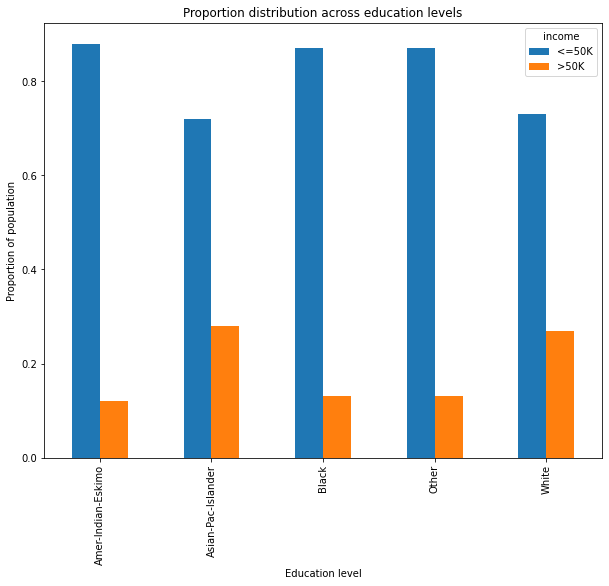

In [14]:
# Try to map the educational number with the education
education = round(pd.crosstab(dataset.race, dataset.income).div(pd.crosstab(dataset.race, dataset.income).apply(sum,1),0),2)

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

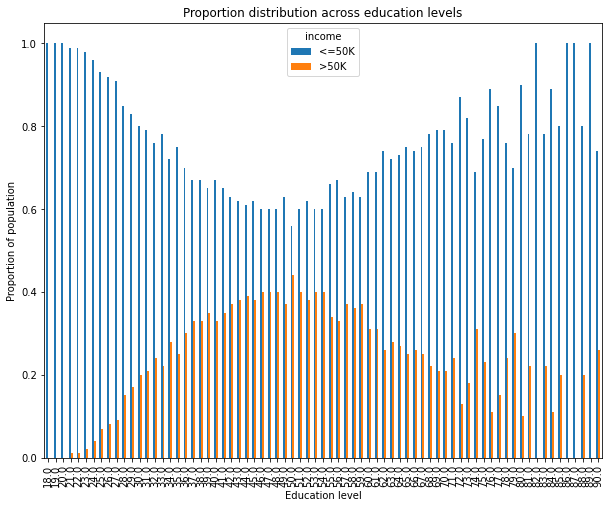

In [15]:
# Try to map the educational number with the education

education = round(pd.crosstab(dataset.age, dataset.income).div(pd.crosstab(dataset.age, dataset.income).apply(sum,1),0),2)

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

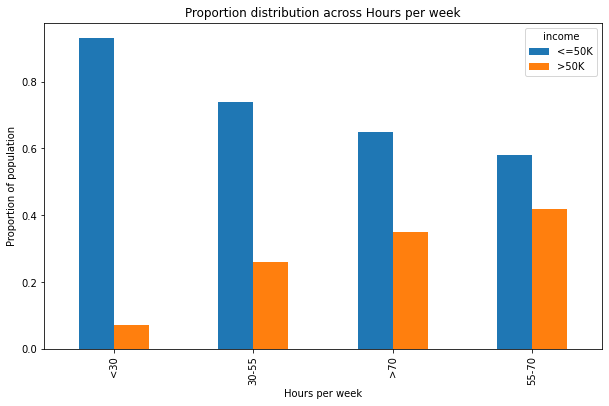

In [16]:
# túl sok adat, a kor folytonos, csoportosítsuk kicsit
temp = dataset.copy()
temp["ageCat"] = ['<30' if i < 30 else '30-55' if i <= 55 else '55-70' if i <= 70 else '>70' for i in temp['hoursPerWeek']]
temp['ageCat'] = temp['ageCat'].astype('category')

hours_per_week = round(pd.crosstab(temp.ageCat, temp.income).div(pd.crosstab(temp.ageCat, temp.income).apply(sum,1),0),2)

hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')
#TODO: CHeck heatmap

Text(0, 0.5, 'Proportion of population')

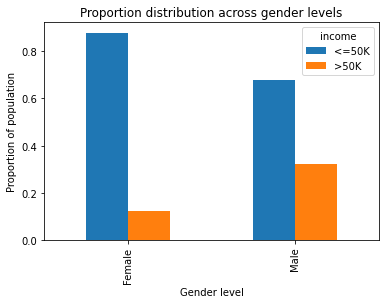

In [17]:
gender = round(pd.crosstab(dataset.gender, dataset.income).div(pd.crosstab(dataset.gender, dataset.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')



Text(0, 0.5, 'Proportion of population')

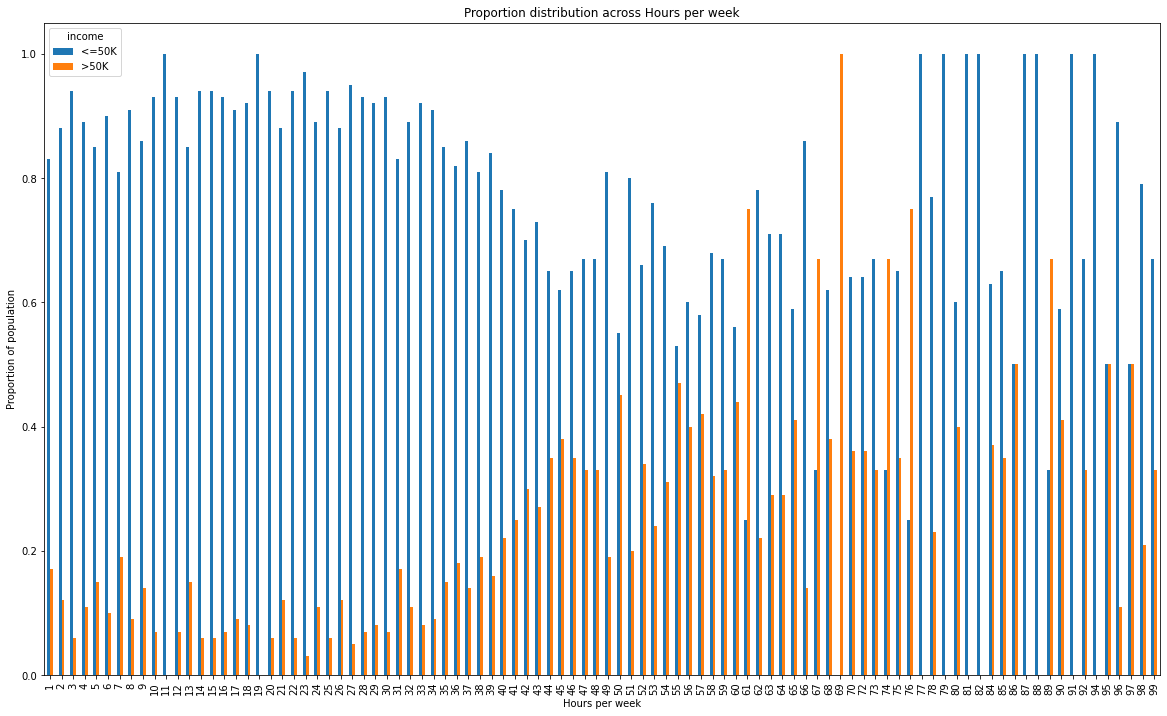

In [18]:
hours_per_week = round(pd.crosstab(dataset['hoursPerWeek'], dataset.income).div(pd.crosstab(dataset['hoursPerWeek'], dataset.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

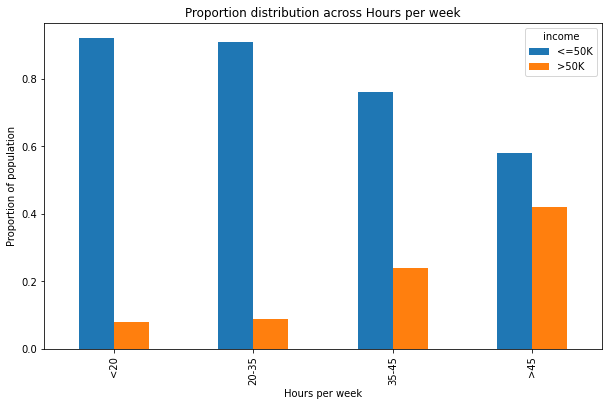

In [19]:
temp = dataset.copy()
temp["workHourCat"] = ['<20' if i < 20 else '20-35' if i <= 35 else '35-45' if i <= 45 else '>45' for i in temp['hoursPerWeek']]
temp['workHourCat'] = temp['workHourCat'].astype('category')

hours_per_week = round(pd.crosstab(temp.workHourCat, temp.income).div(pd.crosstab(temp.workHourCat, temp.income).apply(sum,1),0),2)

hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

## 2.3. Occupation vs Income


Text(0, 0.5, 'Proportion of population')

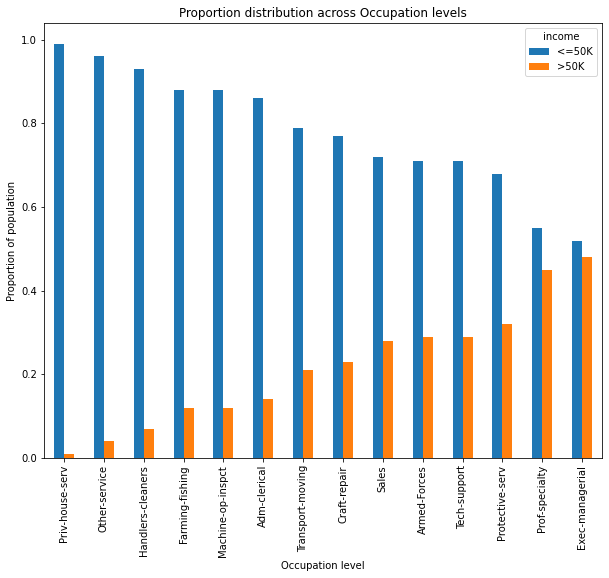

In [20]:

print('## 2.3. Occupation vs Income')

occupation = round(pd.crosstab(dataset.occupation, dataset.income).div(pd.crosstab(dataset.occupation, dataset.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

In [28]:
#dataset.corr(method='pearson')
#dataset.corr(method='spearman')
dataset.corr(method='kendall')

# ez alapján látszódik, hogy nem korrelál semmi semmivel

,age,finalWeight,educationalNum,capitalGain,capitalLoss,hoursPerWeek
age,1.000000,-0.054796,0.034018,0.096587,0.048612,0.100456
finalWeight,-0.054796,1.000000,-0.024712,-0.008288,-0.001856,-0.016901
educationalNum,0.034018,-0.024712,1.000000,0.103113,0.067530,0.115106
capitalGain,0.096587,-0.008288,0.103113,1.000000,-0.065680,0.079516
capitalLoss,0.048612,-0.001856,0.067530,-0.065680,1.000000,0.052156
hoursPerWeek,0.100456,-0.016901,0.115106,0.079516,0.052156,1.000000
